In [1]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

C:\Users\Deepak\ana-conda-3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [5]:
from xgboost import XGBClassifier
model = XGBClassifier()
eval_set =[(x_test,y_test)]
model.fit(x_train,y_train,early_stopping_rounds=10,eval_metric="logloss",eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.60697
[1]	validation_0-logloss:0.56261
[2]	validation_0-logloss:0.53835
[3]	validation_0-logloss:0.52276
[4]	validation_0-logloss:0.51074
[5]	validation_0-logloss:0.50890
[6]	validation_0-logloss:0.50851
[7]	validation_0-logloss:0.51019
[8]	validation_0-logloss:0.51279
[9]	validation_0-logloss:0.52036
[10]	validation_0-logloss:0.52229
[11]	validation_0-logloss:0.52651
[12]	validation_0-logloss:0.52992
[13]	validation_0-logloss:0.53040
[14]	validation_0-logloss:0.54070
[15]	validation_0-logloss:0.54597
[16]	validation_0-logloss:0.54907


C:\Users\Deepak\ana-conda-3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Deepak\ana-conda-3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [6]:
from sklearn.metrics import accuracy_score

predictions = model.predict(x_test)

In [7]:
accuracy = accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.23%


In [8]:
from xgboost import plot_importance
from matplotlib import pyplot

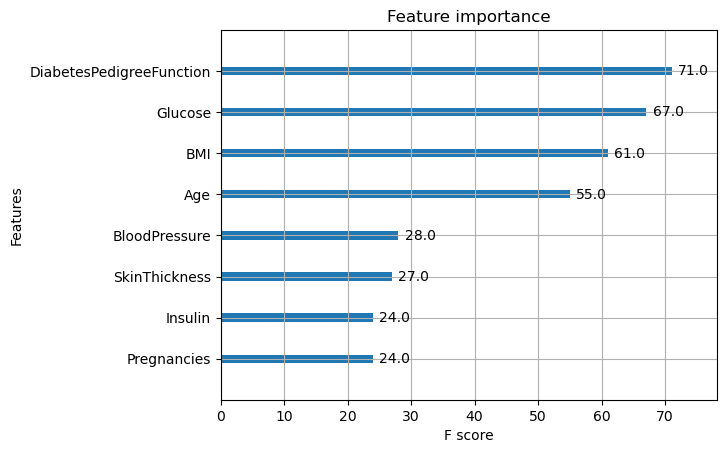

In [9]:
plot_importance(model)
pyplot.show()

In [10]:
import xgboost as xgb

In [11]:
from sklearn.tree import export_graphviz

In [12]:
!pip install graphviz

In [13]:
import graphviz

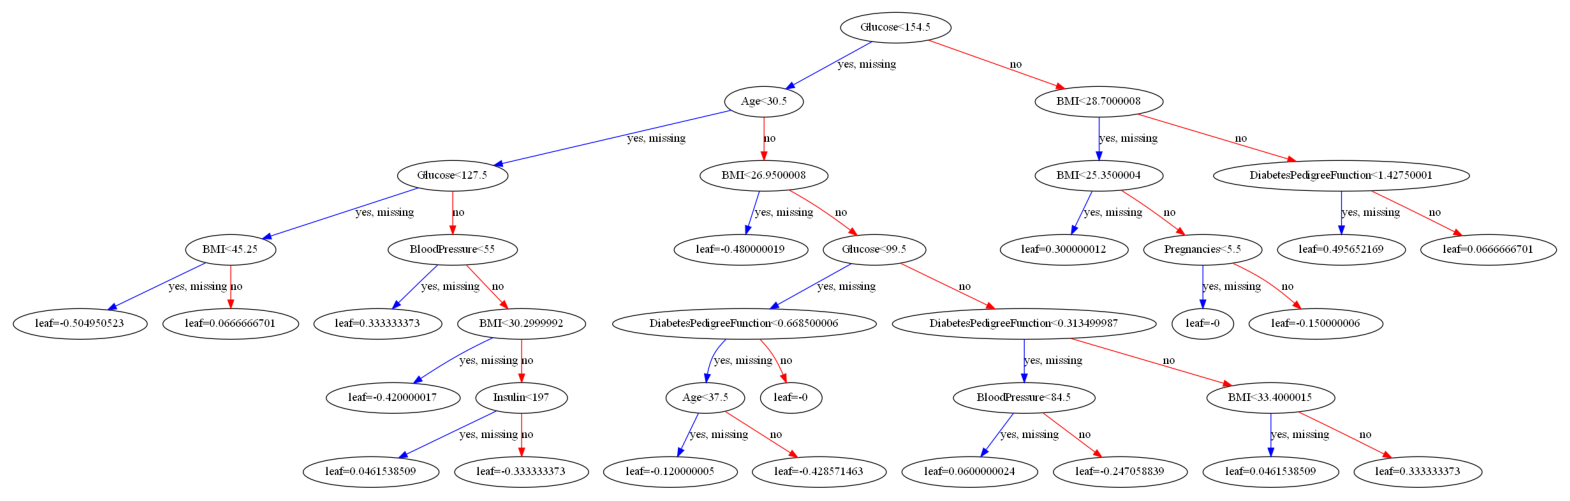

In [14]:
plt.figure(figsize=(20,15))
xgb.plot_tree(model,ax=plt.gca());